In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 6]

# Read the dataset
df = pd.read_csv('University_Dataset.csv')

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
df.info()

print("\nFirst few rows:")
print("-" * 50)
df.head()

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254562 entries, 0 to 254561
Data columns (total 55 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   _id              254562 non-null  int64  
 1   count_id         254562 non-null  int64  
 2   count_date       254562 non-null  object 
 3   location_name    254562 non-null  object 
 4   longitude        254562 non-null  float64
 5   latitude         254562 non-null  float64
 6   centreline_type  254562 non-null  int64  
 7   centreline_id    254562 non-null  int64  
 8   px               177747 non-null  float64
 9   start_time       254562 non-null  object 
 10  end_time         254562 non-null  object 
 11  n_appr_cars_r    254562 non-null  int64  
 12  n_appr_cars_t    254562 non-null  int64  
 13  n_appr_cars_l    254562 non-null  int64  
 14  s_appr_cars_r    254562 non-null  int64  
 15  s_appr_cars_t    254

,_id,count_id,count_date,location_name,longitude,latitude,centreline_type,centreline_id,px,start_time,...,w_appr_bus_t,w_appr_bus_l,n_appr_peds,s_appr_peds,e_appr_peds,w_appr_peds,n_appr_bike,s_appr_bike,e_appr_bike,w_appr_bike
0,1,39337,2020-01-08,Erindale Ave / Broadview Ave / Broadview Subwa...,-79.358652,43.677521,2,13462138,NaN,2020-01-08T07:30:00,...,0,0,3,0,60,0,4,0,0,0
1,2,39337,2020-01-08,Erindale Ave / Broadview Ave / Broadview Subwa...,-79.358652,43.677521,2,13462138,NaN,2020-01-08T07:45:00,...,0,0,0,0,54,0,3,0,0,0
2,3,39337,2020-01-08,Erindale Ave / Broadview Ave / Broadview Subwa...,-79.358652,43.677521,2,13462138,NaN,2020-01-08T08:00:00,...,0,0,2,1,86,0,2,0,0,0
3,4,39339,2020-01-22,Islington Ave / Market Garden Mews,-79.514446,43.622903,2,20141933,NaN,2020-01-22T13:45:00,...,0,0,0,0,1,0,0,0,0,0
4,5,39337,2020-01-08,Erindale Ave / Broadview Ave / Broadview Subwa...,-79.358652,43.677521,2,13462138,NaN,2020-01-08T08:15:00,...,0,0,3,0,105,0,2,1,0,0


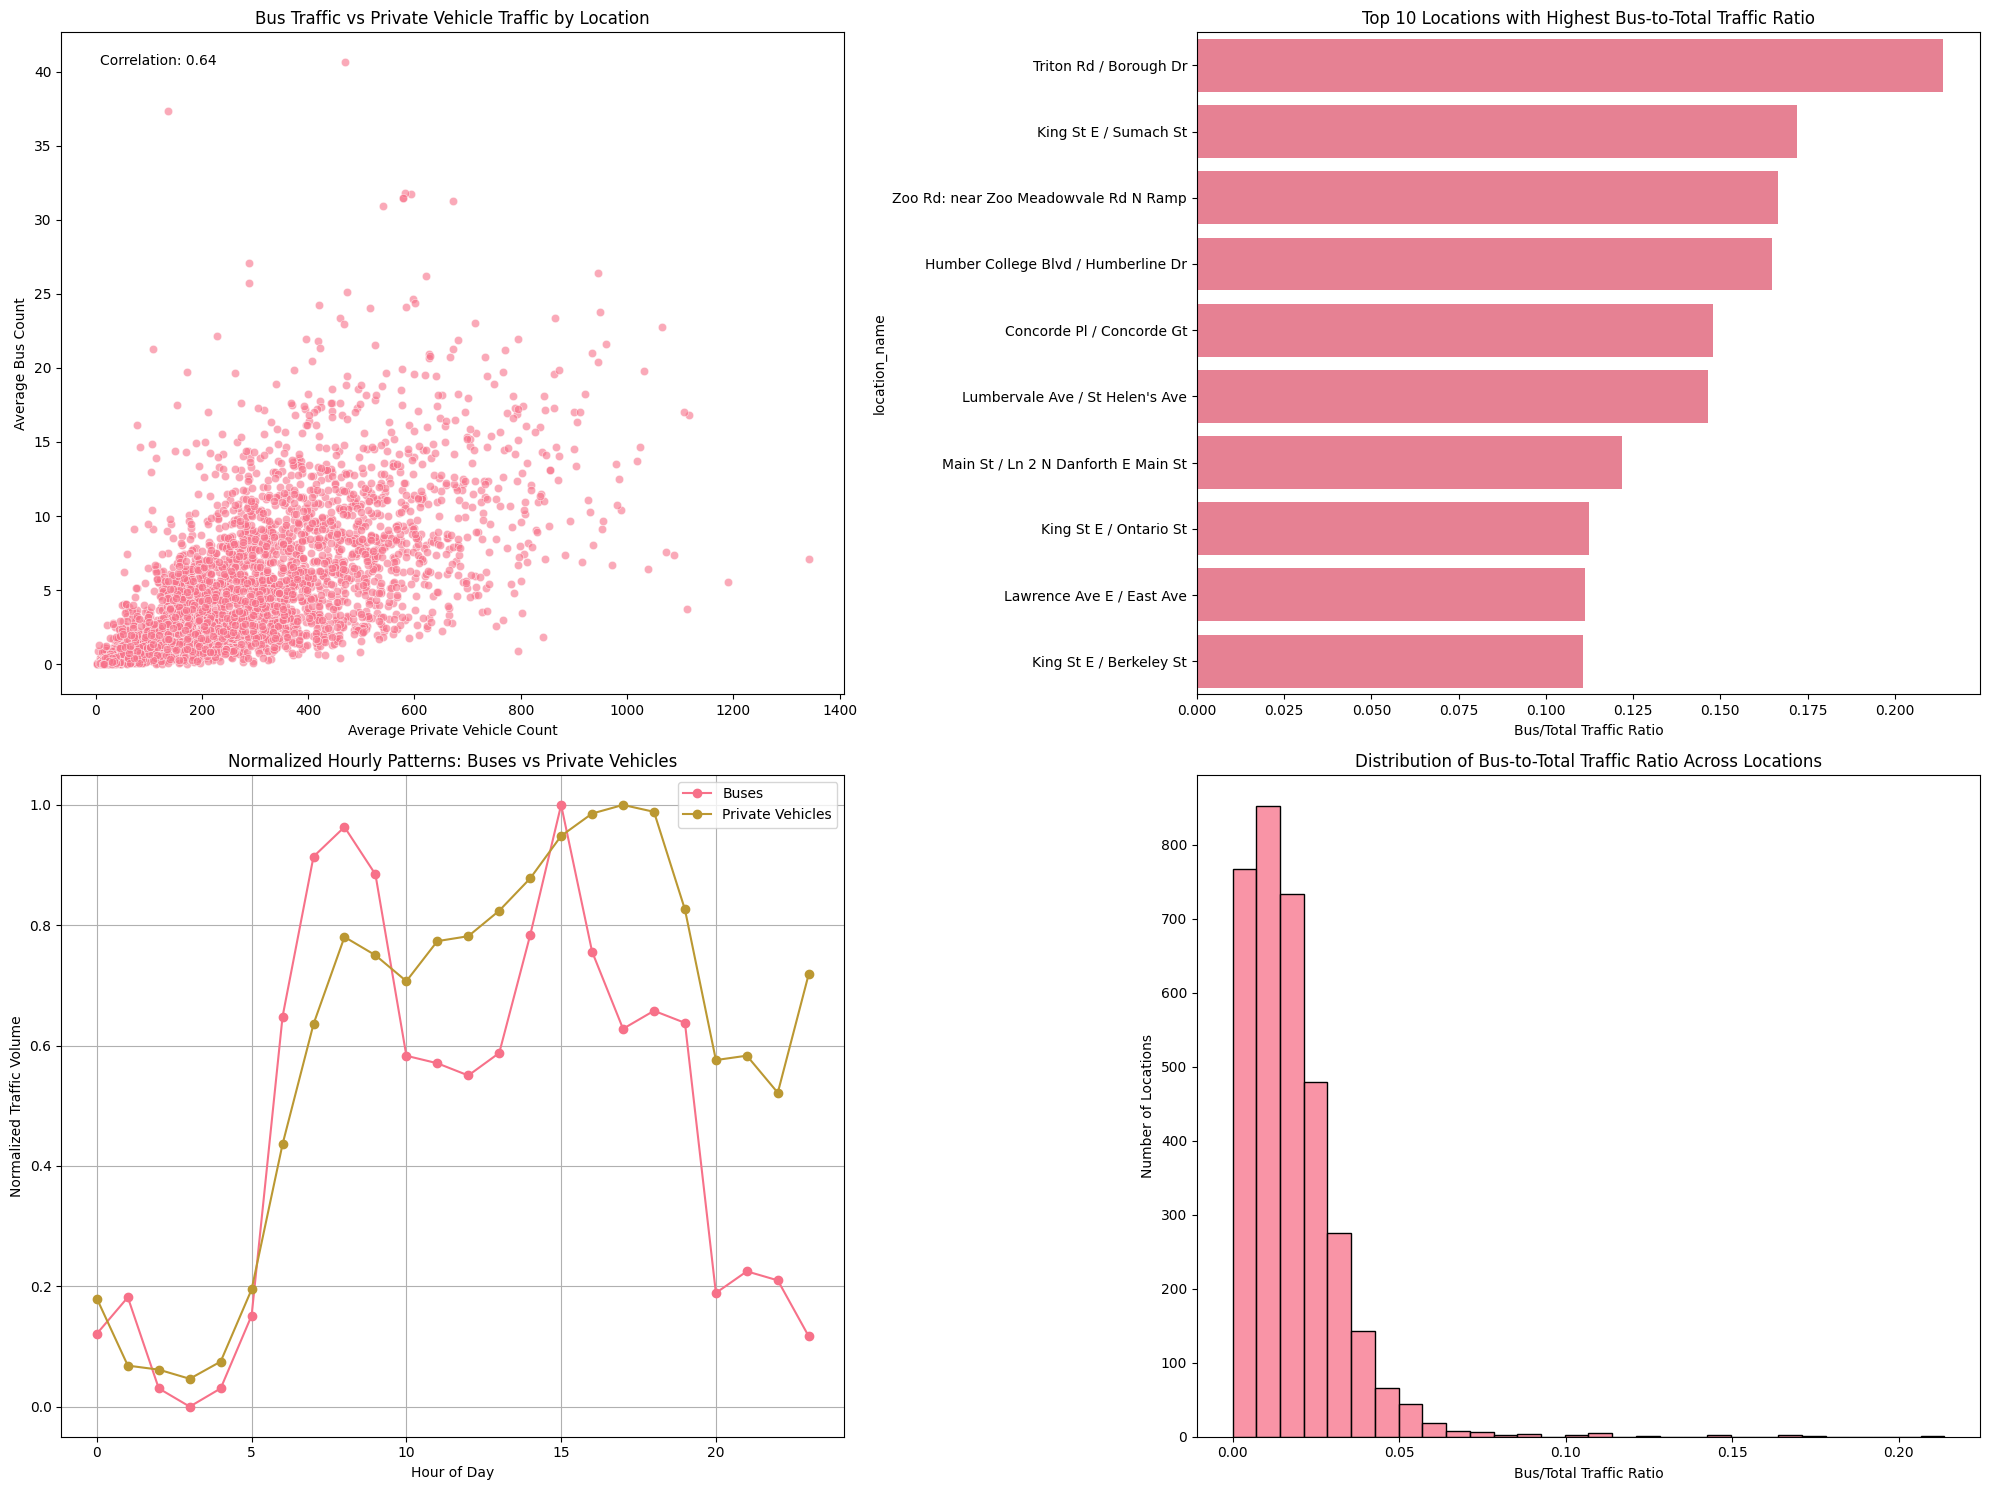

Bus vs Private Vehicle Traffic Analysis
--------------------------------------------------------------------------------

Overall Traffic Composition:
Average buses per location: 5.97
Average private vehicles per location: 337.76
Overall bus to private vehicle ratio: 0.018

Top 10 Locations with Highest Bus Traffic:
--------------------------------------------------

Location: Dundas St W / Poplar Ave / Subway Cres
Bus Traffic: 40.6
Private Vehicles: 470.2
Bus Ratio: 0.080

Location: Triton Rd / Borough Dr
Bus Traffic: 37.3
Private Vehicles: 137.2
Bus Ratio: 0.214

Location: Yonge St / Goulding Ave
Bus Traffic: 31.8
Private Vehicles: 582.5
Bus Ratio: 0.052

Location: Yonge St / Centre Ave
Bus Traffic: 31.7
Private Vehicles: 592.6
Bus Ratio: 0.051

Location: Yonge St / Connaught Ave
Bus Traffic: 31.5
Private Vehicles: 578.8
Bus Ratio: 0.052

Location: Yonge St / Wedgewood Dr
Bus Traffic: 31.5
Private Vehicles: 577.9
Bus Ratio: 0.052

Location: Yonge St / Cummer Ave / Drewry Ave
Bus Traf

In [4]:
# First calculate total bus and traffic columns
df['total_bus'] = (df['n_appr_bus_r'] + df['n_appr_bus_t'] + df['n_appr_bus_l'] +
                   df['s_appr_bus_r'] + df['s_appr_bus_t'] + df['s_appr_bus_l'] +
                   df['e_appr_bus_r'] + df['e_appr_bus_t'] + df['e_appr_bus_l'] +
                   df['w_appr_bus_r'] + df['w_appr_bus_t'] + df['w_appr_bus_l'])

df['total_traffic'] = (
    # Cars
    df['n_appr_cars_r'] + df['n_appr_cars_t'] + df['n_appr_cars_l'] +
    df['s_appr_cars_r'] + df['s_appr_cars_t'] + df['s_appr_cars_l'] +
    df['e_appr_cars_r'] + df['e_appr_cars_t'] + df['e_appr_cars_l'] +
    df['w_appr_cars_r'] + df['w_appr_cars_t'] + df['w_appr_cars_l'] +
    # Buses (total vehicles includes buses)
    df['total_bus']
)

# Extract hour from start_time
df['hour'] = pd.to_datetime(df['start_time']).dt.hour

# Now create the analysis
plt.figure(figsize=(20, 15))

# Calculate metrics for each location
location_comparison = df.groupby('location_name').agg({
    'total_bus': 'mean',
    'total_traffic': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

# Calculate additional metrics
location_comparison['private_vehicles'] = location_comparison['total_traffic'] - location_comparison['total_bus']
location_comparison['bus_ratio'] = location_comparison['total_bus'] / location_comparison['total_traffic']

# 1. Scatter plot of bus vs private vehicle traffic
plt.subplot(2, 2, 1)
sns.scatterplot(data=location_comparison, 
                x='private_vehicles', 
                y='total_bus',
                alpha=0.6)
plt.title('Bus Traffic vs Private Vehicle Traffic by Location')
plt.xlabel('Average Private Vehicle Count')
plt.ylabel('Average Bus Count')

# Add correlation coefficient
correlation = location_comparison['total_bus'].corr(location_comparison['private_vehicles'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

# 2. Top 10 locations with highest bus-to-private vehicle ratio
plt.subplot(2, 2, 2)
top_ratio_locations = location_comparison.nlargest(10, 'bus_ratio')
sns.barplot(data=top_ratio_locations, 
            x='bus_ratio', 
            y='location_name')
plt.title('Top 10 Locations with Highest Bus-to-Total Traffic Ratio')
plt.xlabel('Bus/Total Traffic Ratio')

# 3. Hourly comparison of bus vs private vehicles
plt.subplot(2, 2, 3)
hourly_comparison = df.groupby('hour').agg({
    'total_bus': 'mean',
    'total_traffic': 'mean'
}).reset_index()
hourly_comparison['private_vehicles'] = hourly_comparison['total_traffic'] - hourly_comparison['total_bus']

# Plot normalized values for comparison
normalized_buses = hourly_comparison['total_bus'] / hourly_comparison['total_bus'].max()
normalized_private = hourly_comparison['private_vehicles'] / hourly_comparison['private_vehicles'].max()

plt.plot(hourly_comparison['hour'], normalized_buses, 
         label='Buses', marker='o')
plt.plot(hourly_comparison['hour'], normalized_private, 
         label='Private Vehicles', marker='o')
plt.title('Normalized Hourly Patterns: Buses vs Private Vehicles')
plt.xlabel('Hour of Day')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True)

# 4. Distribution of bus impact across locations
plt.subplot(2, 2, 4)
sns.histplot(data=location_comparison, x='bus_ratio', bins=30)
plt.title('Distribution of Bus-to-Total Traffic Ratio Across Locations')
plt.xlabel('Bus/Total Traffic Ratio')
plt.ylabel('Number of Locations')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("Bus vs Private Vehicle Traffic Analysis")
print("-" * 80)

# Overall statistics
print("\nOverall Traffic Composition:")
total_bus_avg = df['total_bus'].mean()
total_private_avg = df['total_traffic'].mean() - total_bus_avg
print(f"Average buses per location: {total_bus_avg:.2f}")
print(f"Average private vehicles per location: {total_private_avg:.2f}")
print(f"Overall bus to private vehicle ratio: {(total_bus_avg/total_private_avg):.3f}")

# Top locations analysis
print("\nTop 10 Locations with Highest Bus Traffic:")
print("-" * 50)
for _, loc in location_comparison.nlargest(10, 'total_bus').iterrows():
    print(f"\nLocation: {loc['location_name']}")
    print(f"Bus Traffic: {loc['total_bus']:.1f}")
    print(f"Private Vehicles: {loc['private_vehicles']:.1f}")
    print(f"Bus Ratio: {loc['bus_ratio']:.3f}")

# Peak hour analysis
print("\nPeak Hour Analysis:")
print("-" * 50)
for vehicle_type in ['Bus', 'Private']:
    if vehicle_type == 'Bus':
        peak_hour = hourly_comparison['total_bus'].idxmax()
        peak_volume = hourly_comparison.loc[peak_hour, 'total_bus']
    else:
        peak_hour = hourly_comparison['private_vehicles'].idxmax()
        peak_volume = hourly_comparison.loc[peak_hour, 'private_vehicles']
    
    print(f"\n{vehicle_type} Vehicles:")
    print(f"Peak Hour: {hourly_comparison.loc[peak_hour, 'hour']:02d}:00")
    print(f"Peak Volume: {peak_volume:.1f}")

# Location categories
print("\nLocation Categories by Bus Impact:")
print("-" * 50)

# Define categories based on bus ratio
high_bus_impact = location_comparison[location_comparison['bus_ratio'] > location_comparison['bus_ratio'].quantile(0.75)]
low_bus_impact = location_comparison[location_comparison['bus_ratio'] < location_comparison['bus_ratio'].quantile(0.25)]

print(f"\nHigh Bus Impact Locations (top 25%, bus ratio > {high_bus_impact['bus_ratio'].min():.3f}):")
for _, loc in high_bus_impact.nlargest(5, 'total_traffic').iterrows():
    print(f"- {loc['location_name']}: {loc['bus_ratio']:.3f} bus ratio")

print(f"\nLow Bus Impact Locations (bottom 25%, bus ratio < {low_bus_impact['bus_ratio'].max():.3f}):")
for _, loc in low_bus_impact.nlargest(5, 'total_traffic').iterrows():
    print(f"- {loc['location_name']}: {loc['bus_ratio']:.3f} bus ratio")

Certain locations, such as Triton Rd / Borough Dr, have a high bus-to-traffic ratio, indicating bus priority lanes could be beneficial.
Many high-congestion locations have very low bus traffic, meaning transit expansion could help reduce congestion.
Bus and private vehicle traffic follow similar hourly patterns, but bus traffic peaks earlier.
Traffic signal optimization and better bus scheduling could improve efficiency in mixed-traffic locations.

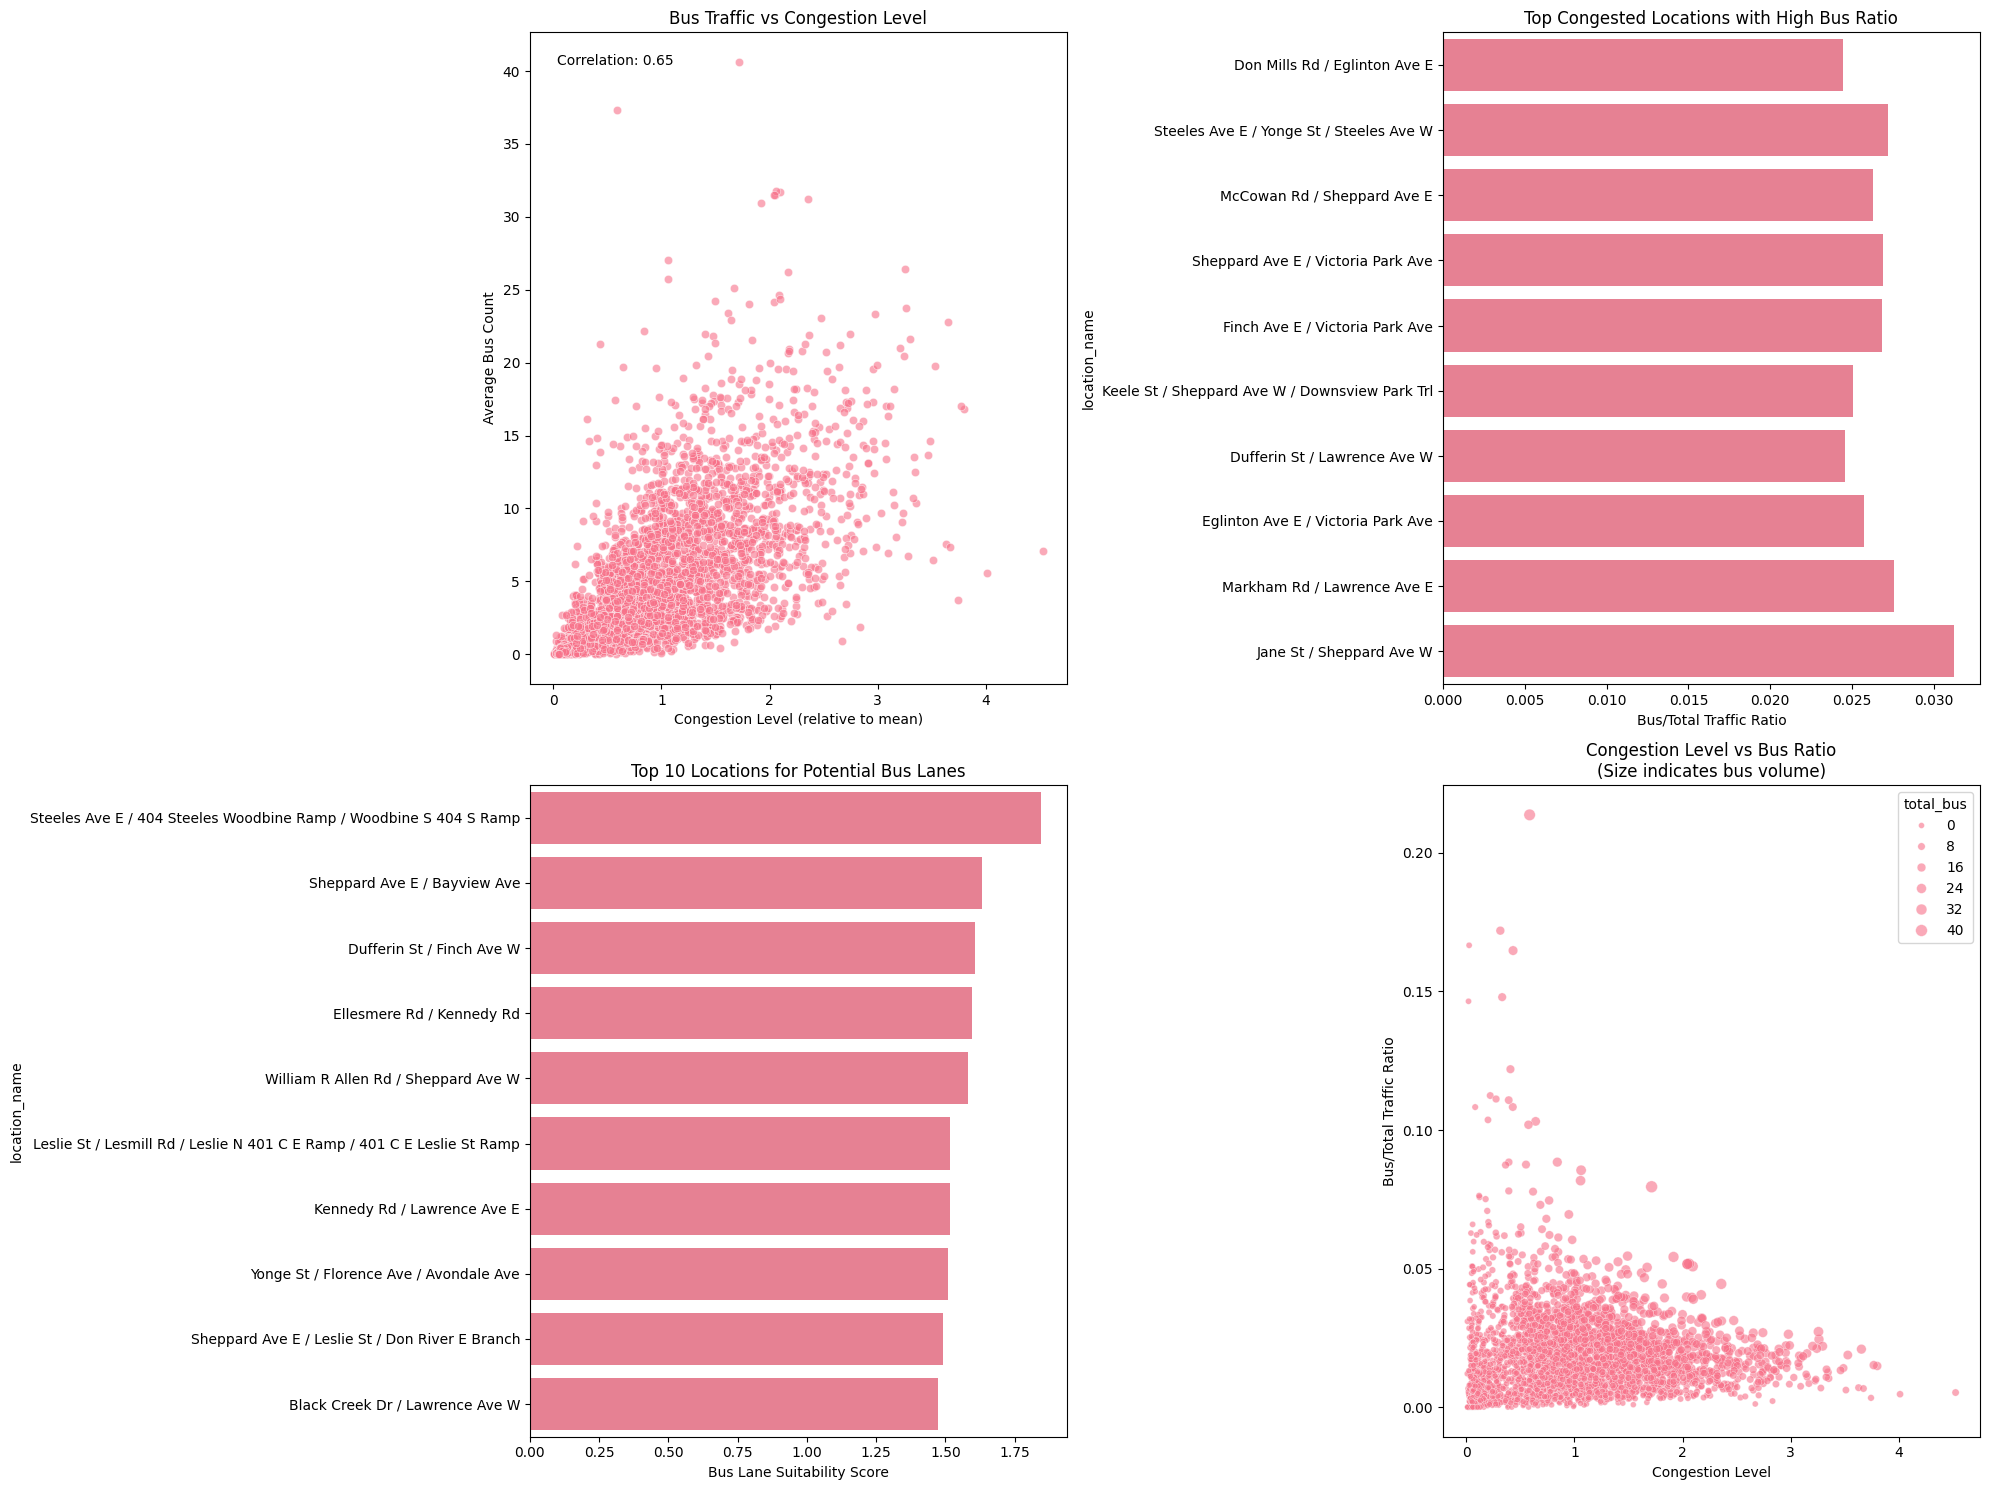

Congestion and Bus Traffic Analysis
--------------------------------------------------------------------------------

Correlation Analysis:
Correlation between congestion and bus traffic: 0.654

Top 10 Locations Most Suitable for Bus Lanes:
--------------------------------------------------

Location: Steeles Ave E / 404 Steeles Woodbine Ramp / Woodbine S 404 S Ramp
Bus Lane Suitability Score: 1.847
Congestion Level: 4.52x average
Bus Ratio: 0.005
Average Daily Buses: 7.1

Location: Sheppard Ave E / Bayview Ave
Bus Lane Suitability Score: 1.633
Congestion Level: 4.01x average
Bus Ratio: 0.005
Average Daily Buses: 5.6

Location: Dufferin St / Finch Ave W
Bus Lane Suitability Score: 1.609
Congestion Level: 3.80x average
Bus Ratio: 0.015
Average Daily Buses: 16.8

Location: Ellesmere Rd / Kennedy Rd
Bus Lane Suitability Score: 1.597
Congestion Level: 3.77x average
Bus Ratio: 0.015
Average Daily Buses: 17.0

Location: William R Allen Rd / Sheppard Ave W
Bus Lane Suitability Score: 1.582
Co

In [5]:
# Calculate congestion and bus metrics
plt.figure(figsize=(20, 15))

# Create congestion metrics
location_analysis = df.groupby('location_name').agg({
    'total_bus': 'mean',
    'total_traffic': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

# Calculate congestion metrics
location_analysis['private_vehicles'] = location_analysis['total_traffic'] - location_analysis['total_bus']
location_analysis['bus_ratio'] = location_analysis['total_bus'] / location_analysis['total_traffic']
location_analysis['congestion_level'] = location_analysis['total_traffic'] / location_analysis['total_traffic'].mean()

# 1. Scatter plot of bus traffic vs congestion
plt.subplot(2, 2, 1)
sns.scatterplot(data=location_analysis, 
                x='congestion_level', 
                y='total_bus',
                alpha=0.6)
plt.title('Bus Traffic vs Congestion Level')
plt.xlabel('Congestion Level (relative to mean)')
plt.ylabel('Average Bus Count')

# Add correlation coefficient
correlation = location_analysis['total_bus'].corr(location_analysis['congestion_level'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

# 2. Top congested locations with high bus traffic
plt.subplot(2, 2, 2)
high_impact_locations = location_analysis[
    (location_analysis['congestion_level'] > location_analysis['congestion_level'].quantile(0.75)) &
    (location_analysis['bus_ratio'] > location_analysis['bus_ratio'].quantile(0.75))
].nlargest(10, 'total_traffic')

sns.barplot(data=high_impact_locations, 
            x='bus_ratio', 
            y='location_name')
plt.title('Top Congested Locations with High Bus Ratio')
plt.xlabel('Bus/Total Traffic Ratio')

# 3. Bus lane potential score
location_analysis['bus_lane_score'] = (
    (location_analysis['congestion_level'] * 0.4) + 
    (location_analysis['bus_ratio'] * 0.4) + 
    (location_analysis['total_bus'] / location_analysis['total_bus'].max() * 0.2)
)

plt.subplot(2, 2, 3)
top_bus_lane_candidates = location_analysis.nlargest(10, 'bus_lane_score')
sns.barplot(data=top_bus_lane_candidates,
            x='bus_lane_score',
            y='location_name')
plt.title('Top 10 Locations for Potential Bus Lanes')
plt.xlabel('Bus Lane Suitability Score')

# 4. Congestion vs Bus Ratio Distribution
plt.subplot(2, 2, 4)
sns.scatterplot(data=location_analysis,
                x='congestion_level',
                y='bus_ratio',
                size='total_bus',
                alpha=0.6)
plt.title('Congestion Level vs Bus Ratio\n(Size indicates bus volume)')
plt.xlabel('Congestion Level')
plt.ylabel('Bus/Total Traffic Ratio')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("Congestion and Bus Traffic Analysis")
print("-" * 80)

# Overall correlation analysis
print("\nCorrelation Analysis:")
print(f"Correlation between congestion and bus traffic: {correlation:.3f}")

# Identify locations that would benefit most from bus lanes
print("\nTop 10 Locations Most Suitable for Bus Lanes:")
print("-" * 50)
for _, loc in top_bus_lane_candidates.iterrows():
    print(f"\nLocation: {loc['location_name']}")
    print(f"Bus Lane Suitability Score: {loc['bus_lane_score']:.3f}")
    print(f"Congestion Level: {loc['congestion_level']:.2f}x average")
    print(f"Bus Ratio: {loc['bus_ratio']:.3f}")
    print(f"Average Daily Buses: {loc['total_bus']:.1f}")

# Analysis of high congestion locations
print("\nAnalysis of Highly Congested Locations:")
print("-" * 50)
high_congestion = location_analysis[location_analysis['congestion_level'] > location_analysis['congestion_level'].quantile(0.75)]
print(f"\nAverage bus ratio in highly congested locations: {high_congestion['bus_ratio'].mean():.3f}")
print(f"Average bus ratio in other locations: {location_analysis[~location_analysis.index.isin(high_congestion.index)]['bus_ratio'].mean():.3f}")

# Potential impact analysis
print("\nPotential Impact of Bus Lanes:")
print("-" * 50)
for _, loc in top_bus_lane_candidates.head().iterrows():
    private_vehicle_share = 1 - loc['bus_ratio']
    potential_impact = (loc['total_traffic'] * private_vehicle_share * 0.2)  # Assuming 20% of private traffic might shift to buses
    print(f"\nLocation: {loc['location_name']}")
    print(f"Current daily traffic: {loc['total_traffic']:.0f} vehicles")
    print(f"Potential traffic reduction: {potential_impact:.0f} vehicles")
    print(f"Percentage reduction: {(potential_impact/loc['total_traffic']*100):.1f}%")

# Recommendations
print("\nRecommendations for Bus Lane Implementation:")
print("-" * 50)
print("\nPriority 1 Locations (Immediate Implementation):")
for _, loc in top_bus_lane_candidates[top_bus_lane_candidates['bus_lane_score'] > top_bus_lane_candidates['bus_lane_score'].quantile(0.75)].iterrows():
    print(f"- {loc['location_name']}")
    print(f"  Justification: High congestion ({loc['congestion_level']:.2f}x) with significant bus presence ({loc['bus_ratio']:.3f} ratio)")

print("\nPriority 2 Locations (Further Study Needed):")
for _, loc in top_bus_lane_candidates[
    (top_bus_lane_candidates['bus_lane_score'] <= top_bus_lane_candidates['bus_lane_score'].quantile(0.75)) &
    (top_bus_lane_candidates['bus_lane_score'] > top_bus_lane_candidates['bus_lane_score'].quantile(0.5))
].iterrows():
    print(f"- {loc['location_name']}")
    print(f"  Justification: Moderate congestion ({loc['congestion_level']:.2f}x) with potential for improvement")

Locations like Steeles Ave E and Sheppard Ave E have extremely high congestion but very low bus ratios, meaning buses are likely stuck in private vehicle traffic.
Ellesmere Rd / Kennedy Rd and William R Allen Rd / Sheppard Ave W have moderate congestion levels but show potential for bus lane improvements.

Bus lanes could significantly improve traffic flow in high-congestion areas where buses are currently slowed by private vehicle traffic.
Low bus ratios in highly congested locations suggest inefficiency in current public transit use, meaning better lane management could enhance transit service.
Prioritizing bus lanes at the highest congestion locations (e.g., Steeles Ave E and Sheppard Ave E) could reduce overall congestion impact.

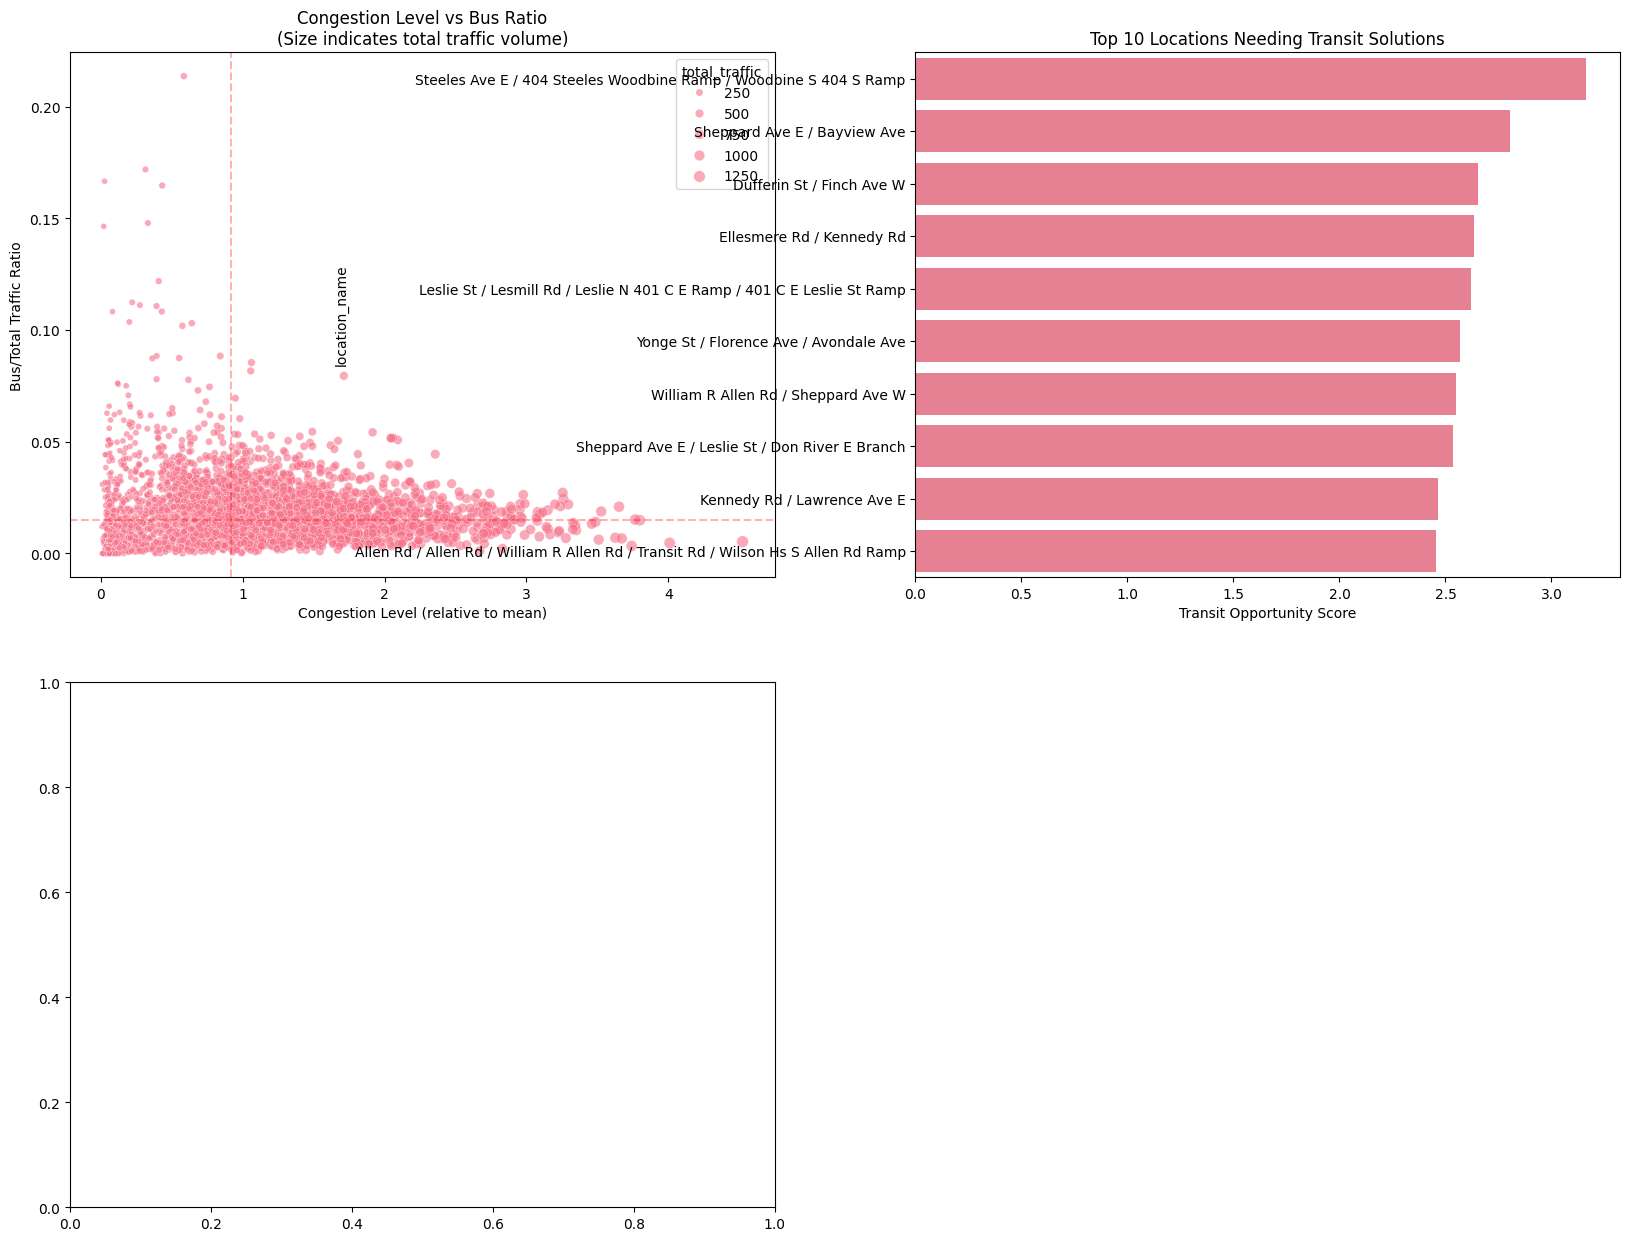

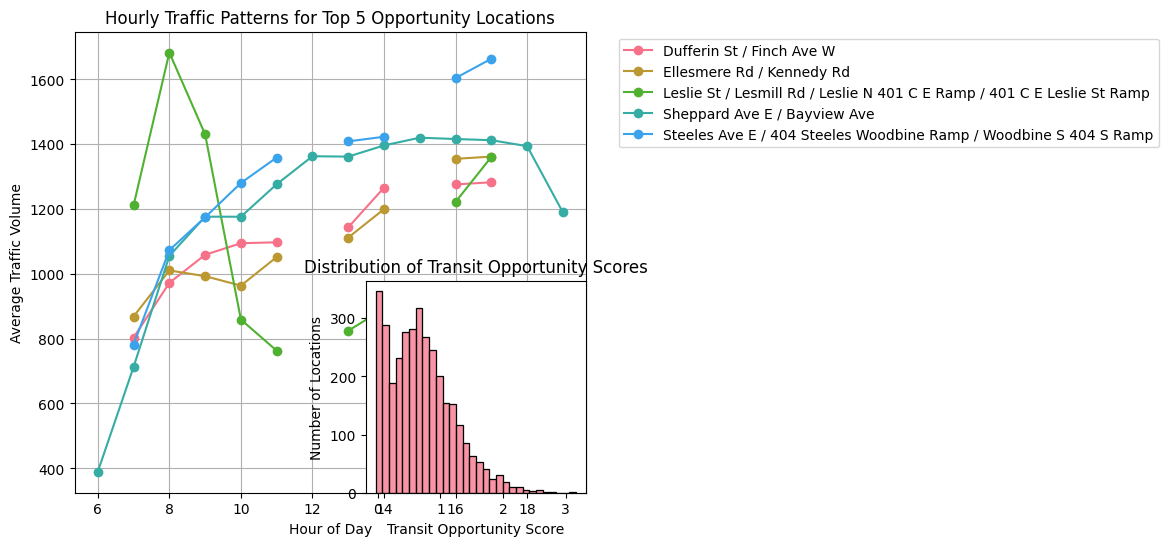

Analysis of Areas Needing Public Transit Solutions
--------------------------------------------------------------------------------

General Statistics:
Total locations analyzed: 3416
Average congestion level: 1.00
Average bus ratio: 0.018

Top 10 Locations Needing Transit Solutions:
--------------------------------------------------

Location: Steeles Ave E / 404 Steeles Woodbine Ramp / Woodbine S 404 S Ramp
Congestion Level: 4.52x average
Current Bus Ratio: 0.005
Daily Traffic Volume: 1349
Current Daily Buses: 7.1
Potential Improvements:
- Additional daily buses needed: 25
- Potential traffic reduction: 270 vehicles

Location: Sheppard Ave E / Bayview Ave
Congestion Level: 4.01x average
Current Bus Ratio: 0.005
Daily Traffic Volume: 1196
Current Daily Buses: 5.6
Potential Improvements:
- Additional daily buses needed: 23
- Potential traffic reduction: 239 vehicles

Location: Dufferin St / Finch Ave W
Congestion Level: 3.80x average
Current Bus Ratio: 0.015
Daily Traffic Volume: 1133


In [6]:
# Create analysis for identifying areas needing public transit solutions
plt.figure(figsize=(20, 15))

# Calculate metrics for each location
location_transit_analysis = df.groupby('location_name').agg({
    'total_bus': 'mean',
    'total_traffic': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

# Calculate derived metrics
location_transit_analysis['private_vehicles'] = location_transit_analysis['total_traffic'] - location_transit_analysis['total_bus']
location_transit_analysis['bus_ratio'] = location_transit_analysis['total_bus'] / location_transit_analysis['total_traffic']
location_transit_analysis['congestion_level'] = location_transit_analysis['total_traffic'] / location_transit_analysis['total_traffic'].mean()

# Calculate transit opportunity score
# High score = high congestion + low bus ratio (good candidate for transit improvement)
location_transit_analysis['transit_opportunity_score'] = (
    (location_transit_analysis['congestion_level'] * 0.7) -  # Weight congestion more heavily
    (location_transit_analysis['bus_ratio'] * 0.3)           # Lower bus ratio increases the score
)

# 1. Scatter plot of congestion vs bus ratio
plt.subplot(2, 2, 1)
sns.scatterplot(data=location_transit_analysis, 
                x='congestion_level', 
                y='bus_ratio',
                size='total_traffic',
                alpha=0.6)
plt.axvline(x=location_transit_analysis['congestion_level'].median(), 
            color='r', linestyle='--', alpha=0.3)
plt.axhline(y=location_transit_analysis['bus_ratio'].median(), 
            color='r', linestyle='--', alpha=0.3)
plt.title('Congestion Level vs Bus Ratio\n(Size indicates total traffic volume)')
plt.xlabel('Congestion Level (relative to mean)')
plt.ylabel('Bus/Total Traffic Ratio')

# 2. Top locations needing transit solutions
plt.subplot(2, 2, 2)
top_opportunity_locations = location_transit_analysis.nlargest(10, 'transit_opportunity_score')
sns.barplot(data=top_opportunity_locations, 
            x='transit_opportunity_score', 
            y='location_name')
plt.title('Top 10 Locations Needing Transit Solutions')
plt.xlabel('Transit Opportunity Score')

# 3. Hourly traffic patterns for top 5 opportunity locations
plt.subplot(2, 2, 3)
top_5_locations = top_opportunity_locations['location_name'].head()
hourly_patterns = df[df['location_name'].isin(top_5_locations)].groupby(['hour', 'location_name'])['total_traffic'].mean().unstack()
hourly_patterns.plot(marker='o')
plt.title('Hourly Traffic Patterns for Top 5 Opportunity Locations')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# 4. Distribution of transit opportunity scores
plt.subplot(2, 2, 4)
sns.histplot(data=location_transit_analysis, x='transit_opportunity_score', bins=30)
plt.title('Distribution of Transit Opportunity Scores')
plt.xlabel('Transit Opportunity Score')
plt.ylabel('Number of Locations')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("Analysis of Areas Needing Public Transit Solutions")
print("-" * 80)

# Overall statistics
print("\nGeneral Statistics:")
print(f"Total locations analyzed: {len(location_transit_analysis)}")
print(f"Average congestion level: {location_transit_analysis['congestion_level'].mean():.2f}")
print(f"Average bus ratio: {location_transit_analysis['bus_ratio'].mean():.3f}")

# Analyze top opportunity locations
print("\nTop 10 Locations Needing Transit Solutions:")
print("-" * 50)
for _, loc in top_opportunity_locations.iterrows():
    print(f"\nLocation: {loc['location_name']}")
    print(f"Congestion Level: {loc['congestion_level']:.2f}x average")
    print(f"Current Bus Ratio: {loc['bus_ratio']:.3f}")
    print(f"Daily Traffic Volume: {loc['total_traffic']:.0f}")
    print(f"Current Daily Buses: {loc['total_bus']:.1f}")
    
    # Calculate potential impact
    target_bus_ratio = location_transit_analysis['bus_ratio'].quantile(0.75)  # Set target to 75th percentile
    additional_buses_needed = (loc['total_traffic'] * target_bus_ratio) - loc['total_bus']
    potential_traffic_reduction = loc['total_traffic'] * 0.2  # Assume 20% traffic reduction potential
    
    print(f"Potential Improvements:")
    print(f"- Additional daily buses needed: {additional_buses_needed:.0f}")
    print(f"- Potential traffic reduction: {potential_traffic_reduction:.0f} vehicles")

# Time-based analysis for opportunity locations
print("\nPeak Hours Analysis for Top Opportunity Locations:")
print("-" * 50)
top_locations_hourly = df[df['location_name'].isin(top_5_locations)].groupby(['location_name', 'hour'])['total_traffic'].mean()

for location in top_5_locations:
    location_data = top_locations_hourly[location]
    peak_hour = location_data.idxmax()
    print(f"\n{location}:")
    print(f"Peak Hour: {peak_hour}:00")
    print(f"Peak Traffic: {location_data.max():.0f} vehicles")
    print(f"Off-peak Average: {location_data[location_data.index.difference([peak_hour])].mean():.0f} vehicles")

# Recommendations
print("\nRecommendations for Transit Improvements:")
print("-" * 50)

# Priority 1: Immediate Action Needed
print("\nPriority 1 - Immediate Action:")
for _, loc in top_opportunity_locations[top_opportunity_locations['transit_opportunity_score'] > 
                                     top_opportunity_locations['transit_opportunity_score'].quantile(0.75)].iterrows():
    print(f"\n{loc['location_name']}:")
    print(f"- Current situation: {loc['congestion_level']:.2f}x normal congestion, {loc['bus_ratio']:.3f} bus ratio")
    print(f"- Recommended actions:")
    print("  * Increase bus frequency during peak hours")
    print("  * Consider dedicated bus lanes")
    print("  * Implement express bus services")

# Priority 2: Planning Phase
print("\nPriority 2 - Planning Phase:")
for _, loc in top_opportunity_locations[
    (top_opportunity_locations['transit_opportunity_score'] <= top_opportunity_locations['transit_opportunity_score'].quantile(0.75)) &
    (top_opportunity_locations['transit_opportunity_score'] > top_opportunity_locations['transit_opportunity_score'].quantile(0.5))
].iterrows():
    print(f"\n{loc['location_name']}:")
    print(f"- Current situation: {loc['congestion_level']:.2f}x normal congestion, {loc['bus_ratio']:.3f} bus ratio")
    print(f"- Recommended actions:")
    print("  * Conduct detailed transit demand study")
    print("  * Plan for increased bus service")
    print("  * Consider transit signal priority")

Many highly congested areas have extremely low bus ratios, suggesting underutilization of public transit.
Locations with high traffic but few buses present an opportunity for targeted transit expansion.
Traffic volume patterns indicate that congestion peaks during morning and evening rush hours, meaning transit improvements should focus on these times.


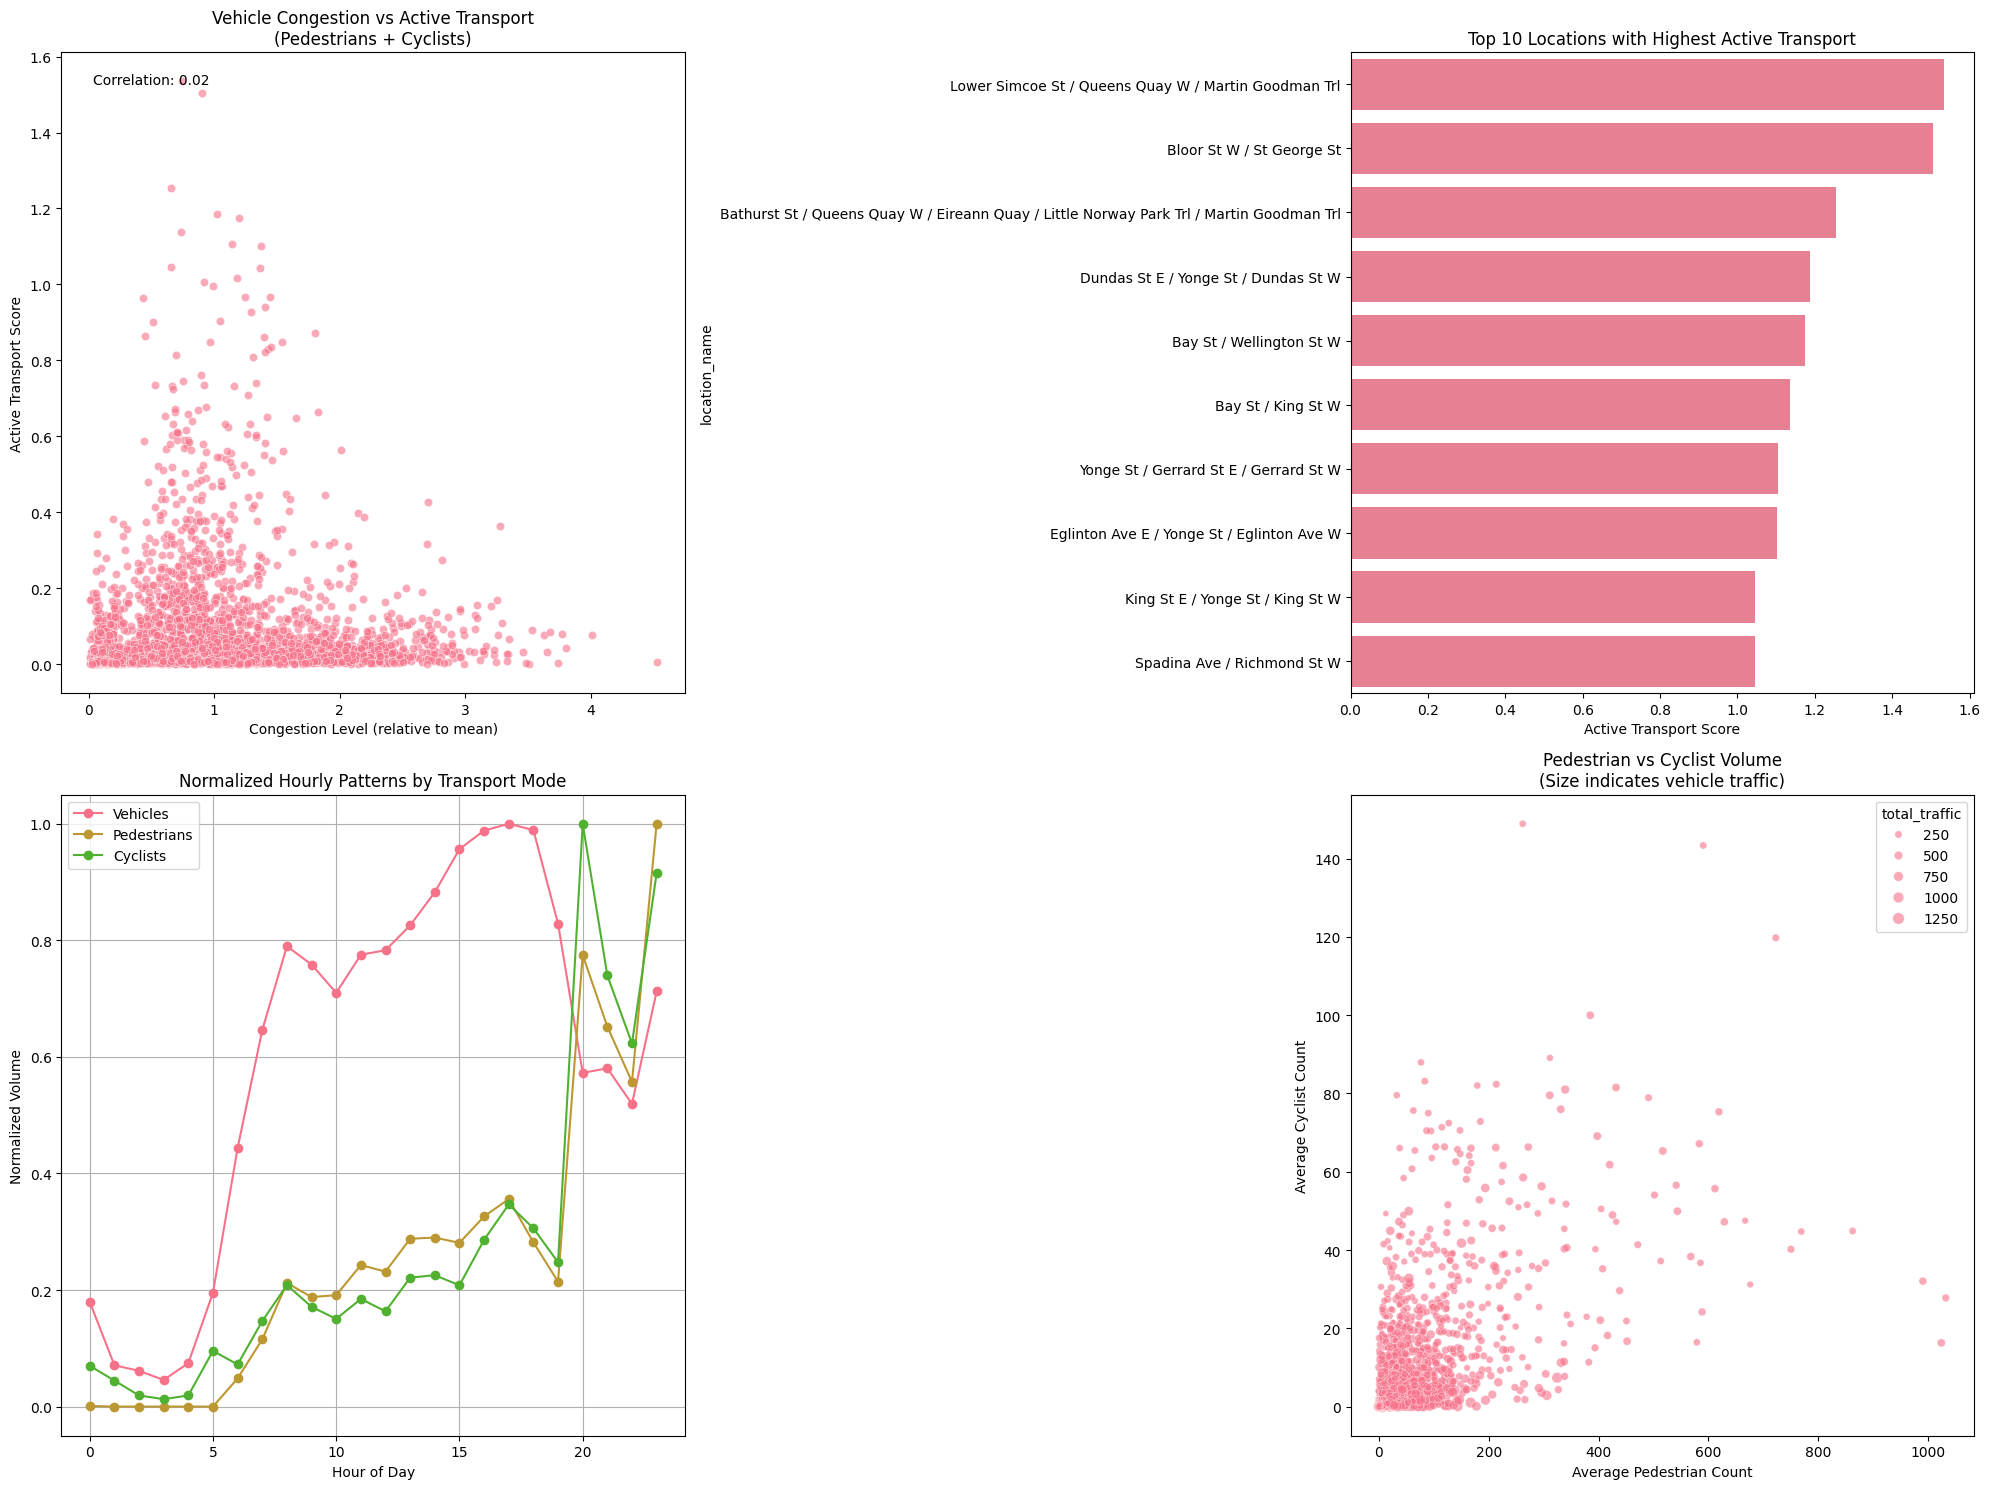

Analysis of Vehicle Congestion vs Active Transport
--------------------------------------------------------------------------------

Correlation Analysis:
Vehicle congestion vs Pedestrians: 0.078
Vehicle congestion vs Cyclists: -0.043
Pedestrians vs Cyclists: 0.611

Top 10 Locations with Highest Active Transport:
--------------------------------------------------

Location: Lower Simcoe St / Queens Quay W / Martin Goodman Trl
Average daily pedestrians: 590
Average daily cyclists: 143
Congestion Level: 0.75x average

Location: Bloor St W / St George St
Average daily pedestrians: 722
Average daily cyclists: 120
Congestion Level: 0.90x average

Location: Bathurst St / Queens Quay W / Eireann Quay / Little Norway Park Trl / Martin Goodman Trl
Average daily pedestrians: 262
Average daily cyclists: 149
Congestion Level: 0.65x average

Location: Dundas St E / Yonge St / Dundas St W
Average daily pedestrians: 1032
Average daily cyclists: 28
Congestion Level: 1.02x average

Location: Bay St / W

In [7]:
# Calculate metrics for pedestrian, cyclist, and vehicle traffic
df['total_pedestrians'] = (df['n_appr_peds'] + df['s_appr_peds'] + 
                          df['e_appr_peds'] + df['w_appr_peds'])
df['total_cyclists'] = (df['n_appr_bike'] + df['s_appr_bike'] + 
                       df['e_appr_bike'] + df['w_appr_bike'])

# Create location-based analysis
location_analysis = df.groupby('location_name').agg({
    'total_pedestrians': 'mean',
    'total_cyclists': 'mean',
    'total_traffic': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

# Calculate normalized metrics and active transport score
location_analysis['congestion_level'] = location_analysis['total_traffic'] / location_analysis['total_traffic'].mean()
location_analysis['active_transport_score'] = (
    (location_analysis['total_pedestrians'] / location_analysis['total_pedestrians'].max()) +
    (location_analysis['total_cyclists'] / location_analysis['total_cyclists'].max())
)

plt.figure(figsize=(20, 15))

# 1. Scatter plot: Vehicle Congestion vs Active Transport
plt.subplot(2, 2, 1)
sns.scatterplot(data=location_analysis,
                x='congestion_level',
                y='active_transport_score',
                alpha=0.6)
plt.title('Vehicle Congestion vs Active Transport\n(Pedestrians + Cyclists)')
plt.xlabel('Congestion Level (relative to mean)')
plt.ylabel('Active Transport Score')

# Add correlation coefficient
correlation = location_analysis['congestion_level'].corr(location_analysis['active_transport_score'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}',
         transform=plt.gca().transAxes)

# 2. Top 10 locations with highest active transport
plt.subplot(2, 2, 2)
top_active_locations = location_analysis.nlargest(10, 'active_transport_score')
sns.barplot(data=top_active_locations,
            x='active_transport_score',
            y='location_name')
plt.title('Top 10 Locations with Highest Active Transport')
plt.xlabel('Active Transport Score')

# 3. Hourly patterns of different transport modes
plt.subplot(2, 2, 3)
hourly_patterns = df.groupby('hour').agg({
    'total_pedestrians': 'mean',
    'total_cyclists': 'mean',
    'total_traffic': 'mean'
}).reset_index()

# Normalize values for comparison
for col in ['total_pedestrians', 'total_cyclists', 'total_traffic']:
    hourly_patterns[f'{col}_norm'] = hourly_patterns[col] / hourly_patterns[col].max()

plt.plot(hourly_patterns['hour'], hourly_patterns['total_traffic_norm'], 
         label='Vehicles', marker='o')
plt.plot(hourly_patterns['hour'], hourly_patterns['total_pedestrians_norm'], 
         label='Pedestrians', marker='o')
plt.plot(hourly_patterns['hour'], hourly_patterns['total_cyclists_norm'], 
         label='Cyclists', marker='o')
plt.title('Normalized Hourly Patterns by Transport Mode')
plt.xlabel('Hour of Day')
plt.ylabel('Normalized Volume')
plt.legend()
plt.grid(True)

# 4. Relationship between pedestrians and cyclists
plt.subplot(2, 2, 4)
sns.scatterplot(data=location_analysis,
                x='total_pedestrians',
                y='total_cyclists',
                size='total_traffic',
                alpha=0.6)
plt.title('Pedestrian vs Cyclist Volume\n(Size indicates vehicle traffic)')
plt.xlabel('Average Pedestrian Count')
plt.ylabel('Average Cyclist Count')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("Analysis of Vehicle Congestion vs Active Transport")
print("-" * 80)

# Overall correlations
print("\nCorrelation Analysis:")
print(f"Vehicle congestion vs Pedestrians: {location_analysis['congestion_level'].corr(location_analysis['total_pedestrians']):.3f}")
print(f"Vehicle congestion vs Cyclists: {location_analysis['congestion_level'].corr(location_analysis['total_cyclists']):.3f}")
print(f"Pedestrians vs Cyclists: {location_analysis['total_pedestrians'].corr(location_analysis['total_cyclists']):.3f}")

# Analyze high active transport locations
print("\nTop 10 Locations with Highest Active Transport:")
print("-" * 50)
for _, loc in top_active_locations.iterrows():
    print(f"\nLocation: {loc['location_name']}")
    print(f"Average daily pedestrians: {loc['total_pedestrians']:.0f}")
    print(f"Average daily cyclists: {loc['total_cyclists']:.0f}")
    print(f"Congestion Level: {loc['congestion_level']:.2f}x average")

# Peak hour analysis
print("\nPeak Hours by Transport Mode:")
print("-" * 50)
for mode in ['total_pedestrians', 'total_cyclists', 'total_traffic']:
    peak_hour = hourly_patterns.loc[hourly_patterns[mode].idxmax(), 'hour']
    peak_volume = hourly_patterns[mode].max()
    print(f"\n{mode.replace('total_', '').capitalize()}:")
    print(f"Peak Hour: {peak_hour:02d}:00")
    print(f"Peak Volume: {peak_volume:.1f}")

# Identify potential conflict areas
print("\nHigh Conflict Areas (High in All Modes):")
print("-" * 50)
conflict_areas = location_analysis[
    (location_analysis['congestion_level'] > location_analysis['congestion_level'].quantile(0.75)) &
    (location_analysis['total_pedestrians'] > location_analysis['total_pedestrians'].quantile(0.75)) &
    (location_analysis['total_cyclists'] > location_analysis['total_cyclists'].quantile(0.75))
]

for _, loc in conflict_areas.iterrows():
    print(f"\nLocation: {loc['location_name']}")
    print(f"Congestion Level: {loc['congestion_level']:.2f}x average")
    print(f"Daily Pedestrians: {loc['total_pedestrians']:.0f}")
    print(f"Daily Cyclists: {loc['total_cyclists']:.0f}")
    print("Recommended interventions:")
    print("- Protected bike lanes")
    print("- Enhanced pedestrian crossings")
    print("- Traffic calming measures")

# Safety recommendations
print("\nSafety Recommendations for High Active Transport Areas:")
print("-" * 50)
for _, loc in top_active_locations.head().iterrows():
    print(f"\n{loc['location_name']}:")
    
    # Customize recommendations based on transport mix
    recommendations = []
    if loc['total_pedestrians'] > location_analysis['total_pedestrians'].quantile(0.9):
        recommendations.extend([
            "- Wider sidewalks",
            "- Additional pedestrian crossings",
            "- Longer crossing times"
        ])
    
    if loc['total_cyclists'] > location_analysis['total_cyclists'].quantile(0.9):
        recommendations.extend([
            "- Protected bike lanes",
            "- Bike boxes at intersections",
            "- Dedicated cyclist signals"
        ])
    
    if loc['congestion_level'] > 1.5:
        recommendations.extend([
            "- Traffic signal optimization",
            "- Consider road diet",
            "- Peak hour traffic management"
        ])
    
    print("\n".join(recommendations))